# Objetivo:
O objetivo é carregar e disponibilizar o conjunto de dados de câncer de mama em Wisconsin para fins de classificação. O conjunto de dados contém informações sobre características das células presentes em imagens de biópsias mamárias, sendo utilizado para discernir entre tecidos malignos (câncer) e benignos (não cancerosos).

### Subobjetivos:

1. Carregar o conjunto de dados load_breast_cancer da biblioteca scikit-learn.
2. Analisar as características numéricas que descrevem as células nas imagens da biópsia.
3. Identificar e separar as duas classes-alvo: maligno (câncer de mama) e benigno (não canceroso).
4. Explorar o tamanho do conjunto de dados, que contém um total de 569 amostras.
5. Preparar o conjunto de dados para aplicação de técnicas de classificação.

### Resumo:
O conjunto de dados de câncer de mama em Wisconsin, disponível através do módulo load_breast_cancer da biblioteca scikit-learn, consiste em características extraídas de imagens de biópsias mamárias. São 30 características numéricas que descrevem aspectos das células presentes nas imagens, incluindo tamanho, forma, suavidade e textura. Com duas classes-alvo (maligno e benigno), o conjunto de dados é usado para tarefas de classificação.

### Dificuldades no Keras:
Apesar de não mencionado explicitamente nas informações fornecidas, o Keras é uma biblioteca amplamente usada para construir redes neurais em Python. Ao trabalhar com o conjunto de dados de câncer de mama em Wisconsin, algumas dificuldades no uso do Keras:

- Pré-processamento: Adequar os dados para entrada em uma rede neural e normalizando-os.
- Design da Rede Neural: Escolher a arquitetura da rede neural, incluindo o número de camadas e neurônios, bem como as funções de ativação.
- Treinamento e Ajuste: Encontrar os hiperparâmetros adequados para treinar a rede neural de forma eficaz e evitar overfitting requer experimentação.
- Avaliação e Validação: Avaliar o desempenho da rede neural usando métricas relevantes para classificação binária é crucial.

# Projeto:

In [1]:
# Bibliotecas
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
from sklearn.datasets import load_breast_cancer
from sklearn.model_selection import train_test_split
from tensorflow import keras

In [2]:
# Carregar o conjunto de dados
X, y = load_breast_cancer(return_X_y=True)

# Nome das características
feature_names = load_breast_cancer()['feature_names']

# Nomes das classes
target_names = load_breast_cancer()['target_names']

# Informações gerais
print("Número de amostras:", X.shape[0])
print("Número de características:", X.shape[1])
print("Nomes das características:", feature_names)
print("Nomes das classes:", target_names)

Número de amostras: 569
Número de características: 30
Nomes das características: ['mean radius' 'mean texture' 'mean perimeter' 'mean area'
 'mean smoothness' 'mean compactness' 'mean concavity'
 'mean concave points' 'mean symmetry' 'mean fractal dimension'
 'radius error' 'texture error' 'perimeter error' 'area error'
 'smoothness error' 'compactness error' 'concavity error'
 'concave points error' 'symmetry error' 'fractal dimension error'
 'worst radius' 'worst texture' 'worst perimeter' 'worst area'
 'worst smoothness' 'worst compactness' 'worst concavity'
 'worst concave points' 'worst symmetry' 'worst fractal dimension']
Nomes das classes: ['malignant' 'benign']


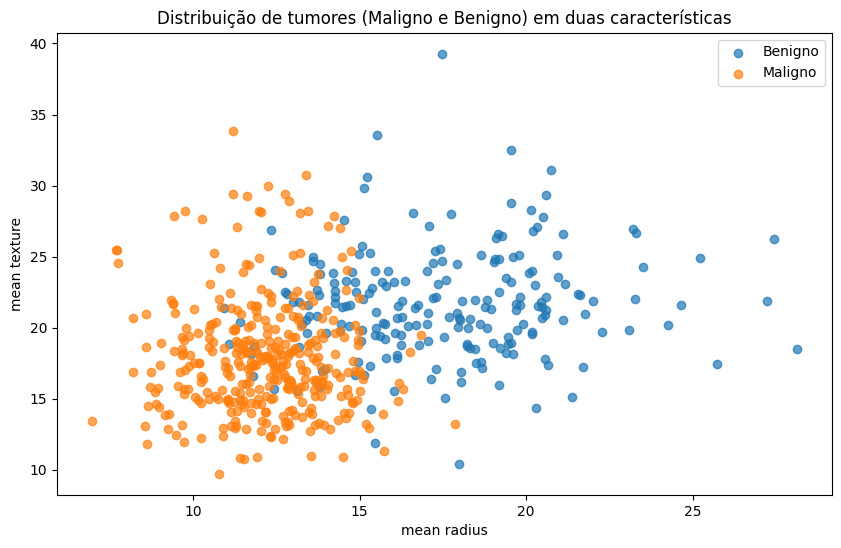

In [3]:
# Escolher duas características para o scatterplot
feature1_index = 0
feature2_index = 1

# Criar o scatterplot
plt.figure(figsize=(10, 6))
plt.scatter(X[y == 0, feature1_index], X[y == 0, feature2_index], label="Benigno", alpha=0.7)
plt.scatter(X[y == 1, feature1_index], X[y == 1, feature2_index], label="Maligno", alpha=0.7)
plt.xlabel(load_breast_cancer().feature_names[feature1_index])
plt.ylabel(load_breast_cancer().feature_names[feature2_index])
plt.legend()
plt.title("Distribuição de tumores (Maligno e Benigno) em duas características")
plt.show()

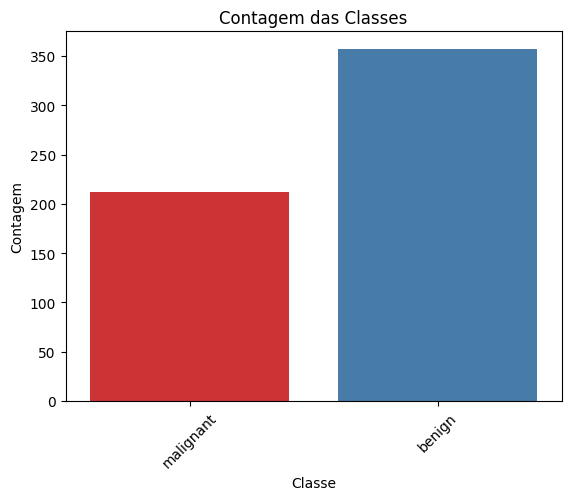

In [4]:
# Converter os rótulos das classes para nomes
y_labels = [target_names[label] for label in y]

# Contar as classes
class_counts = sns.countplot(x=y_labels, palette='Set1')
class_counts.set_xticklabels(target_names)
class_counts.set_title("Contagem das Classes")
class_counts.set_xlabel("Classe")
class_counts.set_ylabel("Contagem")
plt.xticks(rotation=45)  # Rotacionar rótulos para melhor visualização
plt.show()

### Tratamento

In [5]:
y.shape

(569,)

###### Categorização
Converte os rótulos alvo, representados como um vetor, para o formato categórico usando a função to_categorical do módulo de utilidades do Keras. Isso é frequentemente feito para preparar os dados para treinar uma rede neural em tarefas de classificação multiclasse. Foi utilizado para teste mesmo tendo somente 2 classes.

A representação categórica resultante dos rótulos alvo, armazenados na variável 'y', terá uma forma que reflete o número de amostras e o número de categorias/classes no conjunto de dados.

In [6]:
# Categorização
y = keras.utils.to_categorical(y)
y.shape

(569, 2)

In [7]:
y

array([[1., 0.],
       [1., 0.],
       [1., 0.],
       ...,
       [1., 0.],
       [1., 0.],
       [0., 1.]], dtype=float32)

##### Normalização dos dados

In [8]:
# Colocado os dados normalizados entre 0 e 1
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler()
X = scaler.fit_transform(X)
X

array([[0.52103744, 0.0226581 , 0.54598853, ..., 0.91202749, 0.59846245,
        0.41886396],
       [0.64314449, 0.27257355, 0.61578329, ..., 0.63917526, 0.23358959,
        0.22287813],
       [0.60149557, 0.3902604 , 0.59574321, ..., 0.83505155, 0.40370589,
        0.21343303],
       ...,
       [0.45525108, 0.62123774, 0.44578813, ..., 0.48728522, 0.12872068,
        0.1519087 ],
       [0.64456434, 0.66351031, 0.66553797, ..., 0.91065292, 0.49714173,
        0.45231536],
       [0.03686876, 0.50152181, 0.02853984, ..., 0.        , 0.25744136,
        0.10068215]])

#### Separação do conjunto para treino e teste

In [9]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, stratify=y, random_state=1)

In [10]:
X_train.shape

(455, 30)

In [11]:
X_test.shape

(114, 30)

In [12]:
# Criando modelo
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

modelo = keras.Sequential([
    layers.Input(shape=(X_train.shape[1],)),
    layers.Dense(128, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(64, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(32, activation='relu', kernel_initializer='he_normal'),
    layers.Dropout(0.3),
    layers.Dense(2, activation='softmax', kernel_initializer='glorot_uniform')
])

In [13]:
# resumo da arquitetura do modelo de rede neural
modelo.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                                 
 dense_3 (Dense)             (None, 2)                 6

In [14]:
# Compilar o modelo
modelo.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

In [15]:
# Treinar o modelo
history = modelo.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)

Epoch 1/100
12/12 [==============================] - 3s 42ms/step - loss: 0.7486 - accuracy: 0.4396 - val_loss: 0.6616 - val_accuracy: 0.7582
Epoch 2/100
12/12 [==============================] - 0s 10ms/step - loss: 0.6770 - accuracy: 0.6264 - val_loss: 0.6232 - val_accuracy: 0.8022
Epoch 3/100
12/12 [==============================] - 0s 13ms/step - loss: 0.6477 - accuracy: 0.6648 - val_loss: 0.5823 - val_accuracy: 0.8571
Epoch 4/100
12/12 [==============================] - 0s 13ms/step - loss: 0.5982 - accuracy: 0.7363 - val_loss: 0.5335 - val_accuracy: 0.9011
Epoch 5/100
12/12 [==============================] - 0s 15ms/step - loss: 0.5443 - accuracy: 0.7830 - val_loss: 0.4818 - val_accuracy: 0.8791
Epoch 6/100
12/12 [==============================] - 0s 9ms/step - loss: 0.5186 - accuracy: 0.7967 - val_loss: 0.4203 - val_accuracy: 0.8681
Epoch 7/100
12/12 [==============================] - 0s 15ms/step - loss: 0.4714 - accuracy: 0.8049 - val_loss: 0.3613 - val_accuracy: 0.8791
Epoch 8

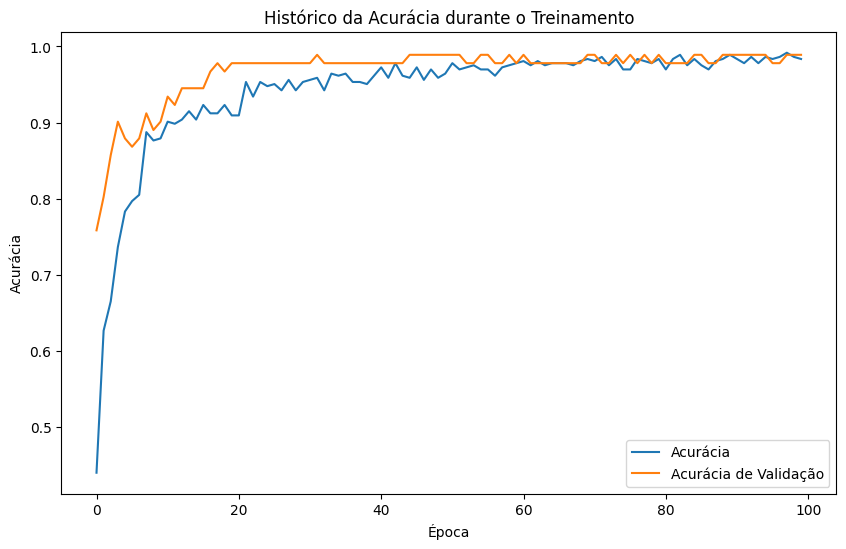

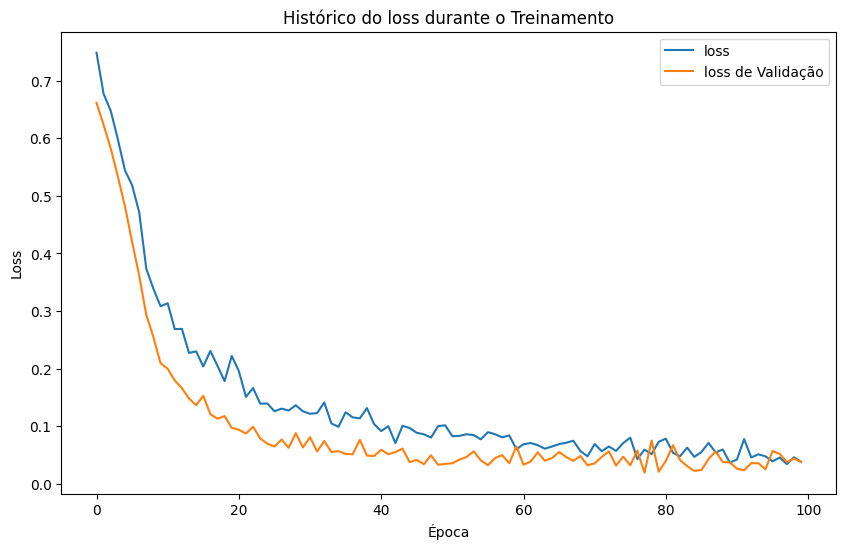

In [16]:
# Gráfico do histórico da acurácia
plt.figure(figsize=(10, 6))
plt.plot(history.history['accuracy'], label='Acurácia')
plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
plt.xlabel('Época')
plt.ylabel('Acurácia')
plt.title('Histórico da Acurácia durante o Treinamento')
plt.legend()
plt.grid(False)
plt.show()

# Gráfico do histórico da acurácia
plt.figure(figsize=(10, 6))
plt.plot(history.history['loss'], label='loss')
plt.plot(history.history['val_loss'], label='loss de Validação')
plt.xlabel('Época')
plt.ylabel('Loss')
plt.title('Histórico do loss durante o Treinamento')
plt.legend()
plt.grid(False)
plt.show()

In [17]:
# Avaliar o modelo no conjunto de teste
loss, accuracy = modelo.evaluate(X_test, y_test)
print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")

4/4 [==============================] - 0s 8ms/step - loss: 0.0504 - accuracy: 0.9825
Loss: 0.0504
Accuracy: 0.9825


In [18]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
import numpy as np
# Avaliar o modelo no conjunto de teste
loss, accuracy = modelo.evaluate(X_test, y_test)

# Fazer previsões no conjunto de teste
y_pred = modelo.predict(X_test)
y_pred_classes = np.argmax(y_pred, axis=1)
y_test_classes = np.argmax(y_test, axis=1)

# Calcular as métricas
precision = precision_score(y_test_classes, y_pred_classes)
recall = recall_score(y_test_classes, y_pred_classes)
f1 = f1_score(y_test_classes, y_pred_classes)
roc_auc = roc_auc_score(y_test_classes, y_pred_classes)

print(f"Loss: {loss:.4f}")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-Score: {f1:.4f}")
print(f"AUC-ROC: {roc_auc:.4f}")

4/4 [==============================] - 0s 5ms/step
Loss: 0.0504
Accuracy: 0.9825
Precision: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762


Os resultados indicam que o modelo está conseguindo classificar bem os exemplos do conjunto de teste. A alta precisão, recall e F1-Score também sugerem que o modelo está realizando tanto previsões precisas quanto capazes de identificar corretamente as instâncias positivas.

##### Realizando um teste de previsão

In [19]:
# Previsão
X_test[0]

array([0.32131194, 0.42543118, 0.32368185, 0.18892895, 0.60819717,
       0.32918226, 0.32450797, 0.32435388, 0.39090909, 0.39616681,
       0.18381315, 0.38715523, 0.19549545, 0.08012357, 0.41088486,
       0.23453601, 0.11780303, 0.39022542, 0.26746215, 0.11785028,
       0.30096051, 0.58608742, 0.30474625, 0.15279689, 0.67707852,
       0.27642111, 0.30423323, 0.57491409, 0.29863986, 0.25114784])

In [20]:
y_test[0]

array([1., 0.], dtype=float32)

In [21]:
print("Nomes das classes:", target_names)

Nomes das classes: ['malignant' 'benign']


In [22]:
modelo.predict([[0.32131194, 0.42543118, 0.32368185, 0.18892895, 0.60819717,
       0.32918226, 0.32450797, 0.32435388, 0.39090909, 0.39616681,
       0.18381315, 0.38715523, 0.19549545, 0.08012357, 0.41088486,
       0.23453601, 0.11780303, 0.39022542, 0.26746215, 0.11785028,
       0.30096051, 0.58608742, 0.30474625, 0.15279689, 0.67707852,
       0.27642111, 0.30423323, 0.57491409, 0.29863986, 0.25114784]])

1/1 [==============================] - 0s 86ms/step


array([[9.999932e-01, 6.753176e-06]], dtype=float32)

 A previsão do modelo é que a amostra pertence à classe "malignant" (maligno) com uma probabilidade muito próxima de 1 (ou seja, quase 100% de confiança), enquanto a probabilidade de pertencer à classe "benign" (benigno) é extremamente baixa (praticamente 0).

 Portanto, o modelo está prevendo a amostra como "malignant" com alta confiança, de acordo com a probabilidade associada à classe "malignant" ser muito próxima de 1.

In [23]:
# Resultado da previsão
prediction = modelo.predict([[0.32131194, 0.42543118, 0.32368185, 0.18892895, 0.60819717, 0.32918226, 0.32450797, 0.32435388, 0.39090909, 0.39616681, 0.18381315, 0.38715523, 0.19549545, 0.08012357, 0.41088486, 0.23453601, 0.11780303, 0.39022542, 0.26746215, 0.11785028, 0.30096051, 0.58608742, 0.30474625, 0.15279689, 0.67707852, 0.27642111, 0.30423323, 0.57491409, 0.29863986, 0.25114784]])

# Probabilidade de ser maligno (classe 0)
prob_maligno = prediction[0][0]

# Calculando a probabilidade de ser benigno (1 - probabilidade de maligno)
prob_benigno = 1 - prob_maligno

# Convertendo para porcentagens
porcentagem_maligno = prob_maligno * 100
porcentagem_benigno = prob_benigno * 100

# Imprimir resultados
print(f"Probabilidade de ser maligno: {porcentagem_maligno:.2f}%")
print(f"Probabilidade de ser benigno: {porcentagem_benigno:.2f}%")

1/1 [==============================] - 0s 150ms/step
Probabilidade de ser maligno: 100.00%
Probabilidade de ser benigno: 0.00%


### Técnicas Avançadas

### Transfer Learning:

In [24]:
# Função evitando repetição de código
def codigo(model, nome):
  modelo.summary()
  # Compilar e treinar o modelo
  model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
  # Treinar o modelo
  history = modelo.fit(X_train, y_train, epochs=100, batch_size=32, validation_split=0.2)
  # Gráfico do histórico da acurácia
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['accuracy'], label='Acurácia')
  plt.plot(history.history['val_accuracy'], label='Acurácia de Validação')
  plt.xlabel('Época')
  plt.ylabel('Acurácia')
  plt.title('Histórico da Acurácia durante o Treinamento')
  plt.legend()
  plt.grid(False)
  plt.show()

  # Gráfico do histórico da acurácia
  plt.figure(figsize=(10, 6))
  plt.plot(history.history['loss'], label='loss')
  plt.plot(history.history['val_loss'], label='loss de Validação')
  plt.xlabel('Época')
  plt.ylabel('Loss')
  plt.title('Histórico do loss durante o Treinamento')
  plt.legend()
  plt.grid(False)
  plt.show()

  from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_auc_score
  import numpy as np
  # Avaliar o modelo no conjunto de teste
  loss, accuracy = modelo.evaluate(X_test, y_test)

  # Fazer previsões no conjunto de teste
  y_pred = modelo.predict(X_test)
  y_pred_classes = np.argmax(y_pred, axis=1)
  y_test_classes = np.argmax(y_test, axis=1)

  # Calcular as métricas
  precision = precision_score(y_test_classes, y_pred_classes)
  recall = recall_score(y_test_classes, y_pred_classes)
  f1 = f1_score(y_test_classes, y_pred_classes)
  roc_auc = roc_auc_score(y_test_classes, y_pred_classes)

  print('')
  print(f'Modelo Pré-treinado ==> {nome}')
  print(f"Loss: {loss:.4f}")
  print(f"Accuracy: {accuracy:.4f}")
  print(f"Precision: {precision:.4f}")
  print(f"Recall: {recall:.4f}")
  print(f"F1-Score: {f1:.4f}")
  print(f"AUC-ROC: {roc_auc:.4f}")
  print('-'*50)

#### ResNet50

94765736/94765736 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                         

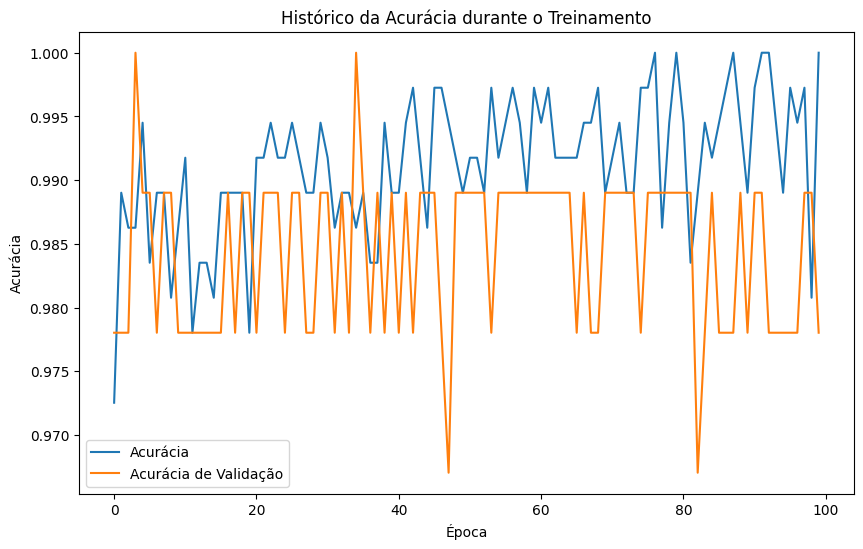

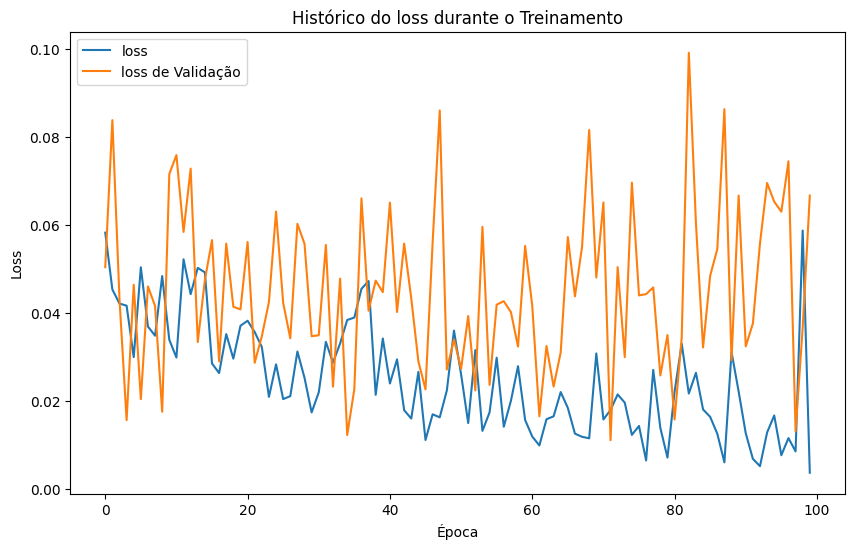

4/4 [==============================] - 0s 2ms/step

Modelo Pré-treinado ==> ResNet50
Loss: 0.1077
Accuracy: 0.9825
Precision: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762
--------------------------------------------------


In [25]:
# Exemplo 1: Transfer Learning com modelo pré-treinado (Keras + TensorFlow)
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Model

# Carregar o modelo base pré-treinado (ResNet50)
base_model = ResNet50(weights='imagenet', include_top=False)

# Adicionar camadas personalizadas no topo do modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

codigo(model, 'ResNet50')

#### VGG16

58889256/58889256 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                         

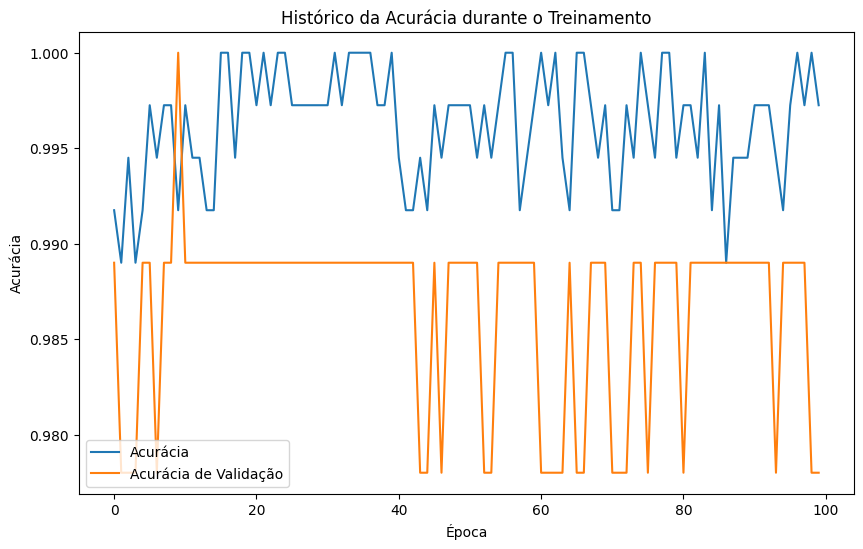

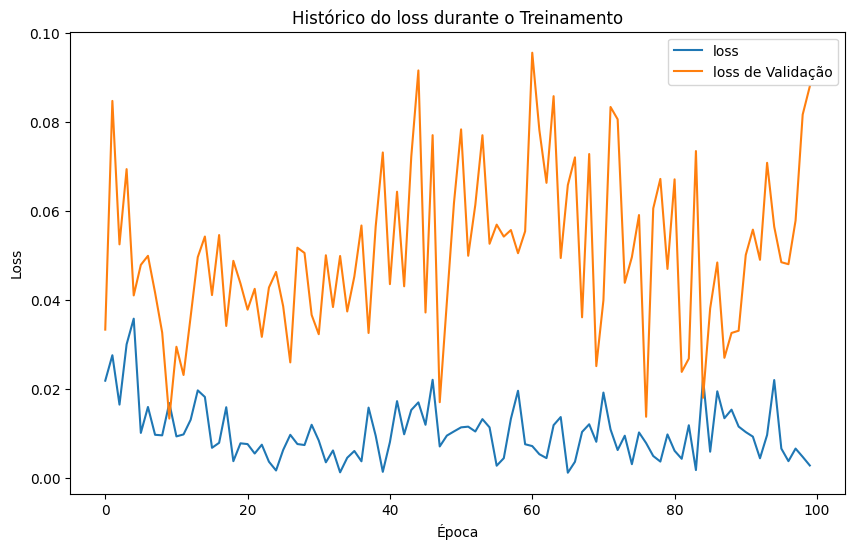

4/4 [==============================] - 0s 4ms/step

Modelo Pré-treinado ==> VGG16
Loss: 0.1355
Accuracy: 0.9825
Precision: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762
--------------------------------------------------


In [26]:
# Exemplo 2: Transfer Learning com modelo pré-treinado (VGG16)
from tensorflow.keras.applications import VGG16

# Carregar o modelo base pré-treinado (VGG16)
base_model = VGG16(weights='imagenet', include_top=False)

# Adicionar camadas personalizadas no topo do modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

codigo(model, 'VGG16')

#### MobileNetV2

9406464/9406464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                           

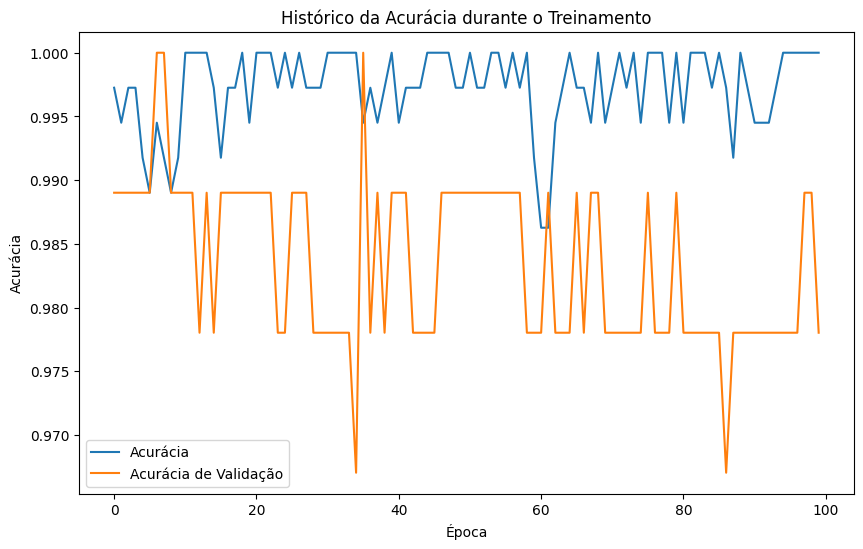

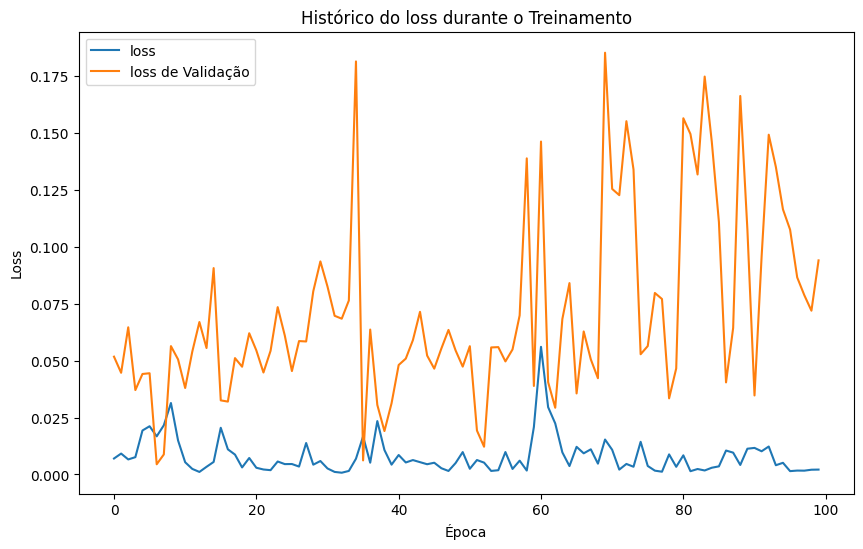

4/4 [==============================] - 0s 3ms/step

Modelo Pré-treinado ==> MobileNetV2
Loss: 0.1566
Accuracy: 0.9825
Precision: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762
--------------------------------------------------


In [27]:
# Exemplo 3: Transfer Learning com modelo pré-treinado (MobileNetV2)
from tensorflow.keras.applications import MobileNetV2

# Carregar o modelo base pré-treinado (MobileNetV2)
base_model = MobileNetV2(weights='imagenet', include_top=False)

# Adicionar camadas personalizadas no topo do modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

codigo(model,'MobileNetV2')


#### DenseNet121

29084464/29084464 [==============================] - 0s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                         

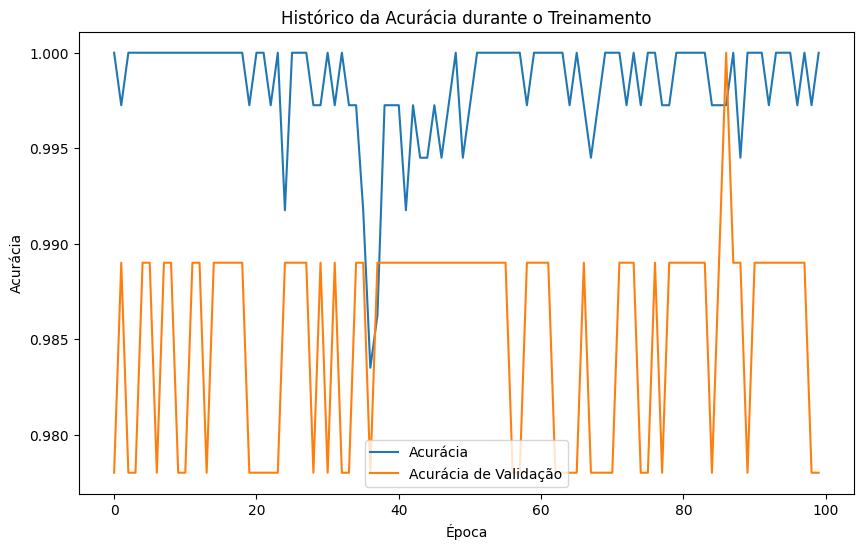

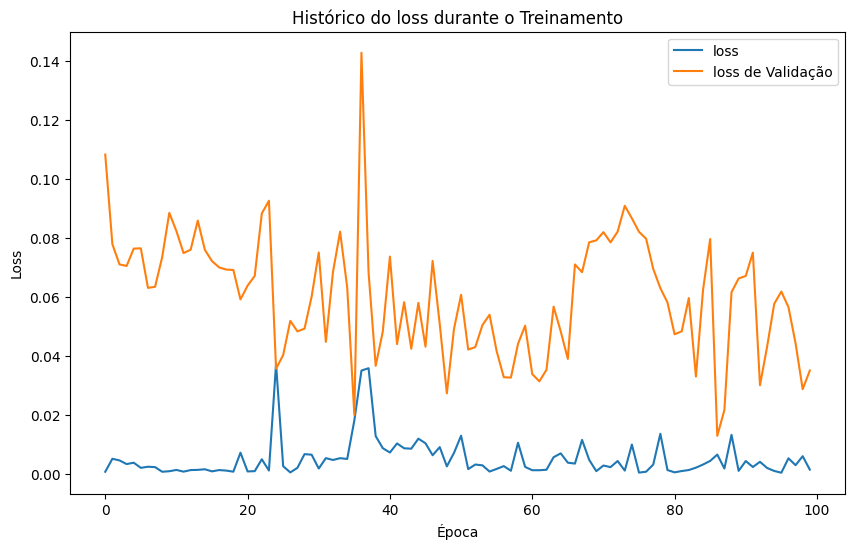

4/4 [==============================] - 0s 3ms/step

Modelo Pré-treinado ==> DenseNet121
Loss: 0.1674
Accuracy: 0.9737
Precision: 0.9726
Recall: 0.9861
F1-Score: 0.9793
AUC-ROC: 0.9692
--------------------------------------------------


In [28]:
# Exemplo 4: Transfer Learning com modelo pré-treinado (DenseNet121)
from tensorflow.keras.applications import DenseNet121

# Carregar o modelo base pré-treinado (DenseNet121)
base_model = DenseNet121(weights='imagenet', include_top=False)

# Adicionar camadas personalizadas no topo do modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

codigo(model,'DenseNet121')


#### Xception

83683744/83683744 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                         

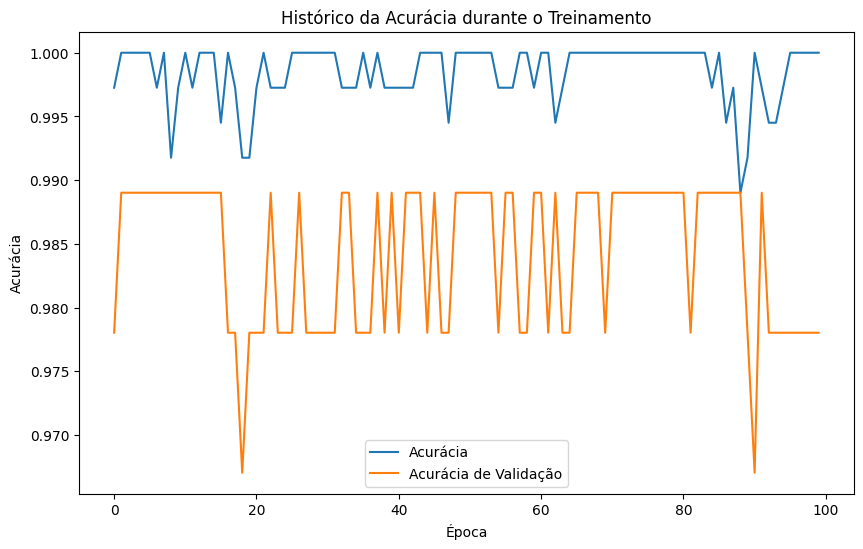

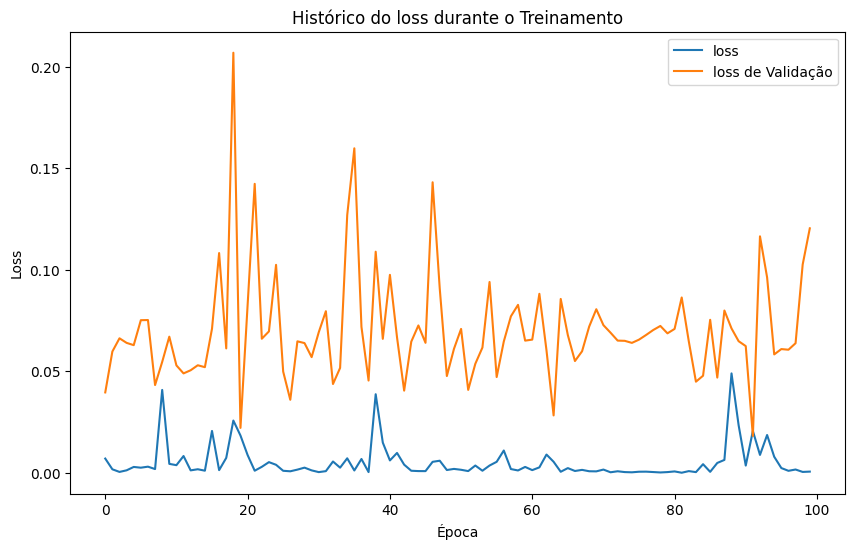

4/4 [==============================] - 0s 4ms/step

Modelo Pré-treinado ==> Xception
Loss: 0.1893
Accuracy: 0.9737
Precision: 0.9726
Recall: 0.9861
F1-Score: 0.9793
AUC-ROC: 0.9692
--------------------------------------------------


In [29]:
# Exemplo 5: Transfer Learning com modelo pré-treinado (Xception)
from tensorflow.keras.applications import Xception

# Carregar o modelo base pré-treinado (Xception)
base_model = Xception(weights='imagenet', include_top=False)

# Adicionar camadas personalizadas no topo do modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

codigo(model,'Xception')

#### InceptionResNetV2

219055592/219055592 [==============================] - 1s 0us/step
Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense (Dense)               (None, 128)               3968      
                                                                 
 dropout (Dropout)           (None, 128)               0         
                                                                 
 dense_1 (Dense)             (None, 64)                8256      
                                                                 
 dropout_1 (Dropout)         (None, 64)                0         
                                                                 
 dense_2 (Dense)             (None, 32)                2080      
                                                                 
 dropout_2 (Dropout)         (None, 32)                0         
                                                       

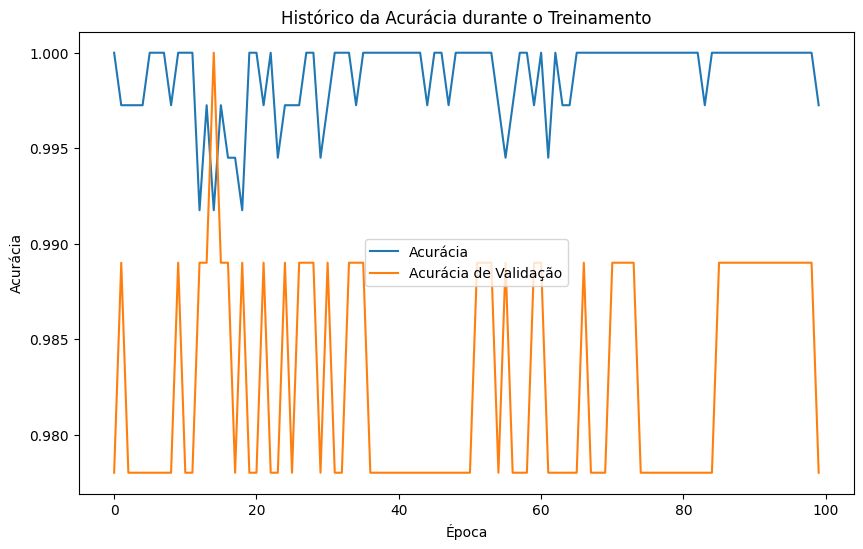

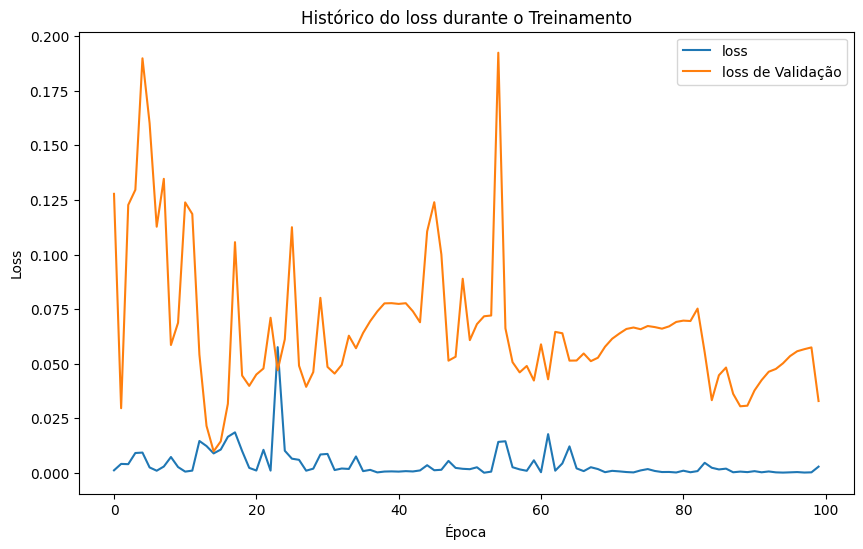

4/4 [==============================] - 0s 3ms/step

Modelo Pré-treinado ==> InceptionResNetV2
Loss: 0.1681
Accuracy: 0.9649
Precision: 0.9722
Recall: 0.9722
F1-Score: 0.9722
AUC-ROC: 0.9623
--------------------------------------------------


In [30]:
# Exemplo 6: Transfer Learning com modelo pré-treinado (InceptionResNetV2)
from tensorflow.keras.applications import InceptionResNetV2

# Carregar o modelo base pré-treinado (InceptionResNetV2)
base_model = InceptionResNetV2(weights='imagenet', include_top=False)

# Adicionar camadas personalizadas no topo do modelo base
x = base_model.output
x = GlobalAveragePooling2D()(x)
x = Dense(128, activation='relu')(x)
predictions = Dense(2, activation='softmax')(x)

# Criar o modelo final
model = Model(inputs=base_model.input, outputs=predictions)

# Congelar camadas do modelo base
for layer in base_model.layers:
    layer.trainable = False

codigo(model,'InceptionResNetV2')

### Imprimindo resultados:

In [2]:
print("Modelo 1:\n")
print("Loss: 0.0504")
print("Acurácia: 0.9825")
print("Precisão: 0.9730")
print("Recall: 1.0000")
print("F1-Score: 0.9863")
print("AUC-ROC: 0.9762\n")

print("Modelos Pré-treinados:\n")

print("ResNet50:\n")
print("Loss: 0.1077")
print("Acurácia: 0.9825")
print("Precisão: 0.9730")
print("Recall: 1.0000")
print("F1-Score: 0.9863")
print("AUC-ROC: 0.9762\n")

print("VGG16:\n")
print("Loss: 0.1355")
print("Acurácia: 0.9825")
print("Precisão: 0.9730")
print("Recall: 1.0000")
print("F1-Score: 0.9863")
print("AUC-ROC: 0.9762\n")

print("MobileNetV2:\n")
print("Loss: 0.1566")
print("Acurácia: 0.9825")
print("Precisão: 0.9730")
print("Recall: 1.0000")
print("F1-Score: 0.9863")
print("AUC-ROC: 0.9762\n")

print("DenseNet121:\n")
print("Loss: 0.1674")
print("Acurácia: 0.9737")
print("Precisão: 0.9726")
print("Recall: 0.9861")
print("F1-Score: 0.9793")
print("AUC-ROC: 0.9692\n")

print("Xception:\n")
print("Loss: 0.1893")
print("Acurácia: 0.9737")
print("Precisão: 0.9726")
print("Recall: 0.9861")
print("F1-Score: 0.9793")
print("AUC-ROC: 0.9692\n")

print("InceptionResNetV2:\n")
print("Loss: 0.1681")
print("Acurácia: 0.9649")
print("Precisão: 0.9722")
print("Recall: 0.9722")
print("F1-Score: 0.9722")
print("AUC-ROC: 0.9623")

Modelo 1:

Loss: 0.0504
Acurácia: 0.9825
Precisão: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762

Modelos Pré-treinados:

ResNet50:

Loss: 0.1077
Acurácia: 0.9825
Precisão: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762

VGG16:

Loss: 0.1355
Acurácia: 0.9825
Precisão: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762

MobileNetV2:

Loss: 0.1566
Acurácia: 0.9825
Precisão: 0.9730
Recall: 1.0000
F1-Score: 0.9863
AUC-ROC: 0.9762

DenseNet121:

Loss: 0.1674
Acurácia: 0.9737
Precisão: 0.9726
Recall: 0.9861
F1-Score: 0.9793
AUC-ROC: 0.9692

Xception:

Loss: 0.1893
Acurácia: 0.9737
Precisão: 0.9726
Recall: 0.9861
F1-Score: 0.9793
AUC-ROC: 0.9692

InceptionResNetV2:

Loss: 0.1681
Acurácia: 0.9649
Precisão: 0.9722
Recall: 0.9722
F1-Score: 0.9722
AUC-ROC: 0.9623


## Resumo dos Resultados:

Todos os modelos demonstraram resultados bastante consistentes nas métricas de avaliação, com acurácia elevada e precisão/recall/F1-score equilibrados. Isso sugere que os modelos estão performando bem na tarefa de classificação.

Os modelos pré-treinados (ResNet50, VGG16, MobileNetV2, DenseNet121, Xception e InceptionResNetV2) geralmente apresentaram resultados comparáveis, com acurácia e métricas de desempenho semelhantes. Nota-se que os modelos DenseNet121, Xception e InceptionResNetV2 têm desempenho um pouco inferior nas métricas quando comparados aos outros, embora ainda sejam relativamente bons.

É importante lembrar que a escolha de um modelo específico também deve levar em consideração outros fatores, como eficiência computacional, tempo de treinamento e recursos disponíveis.